# Kaggle Titanic
## Classification - Logistic Regression
[참고 | Titanic (Classifiaction Models)](https://www.kaggle.com/code/fatmakursun/titanic-classification-models)
### Logistic Regression 모델을 이용한 분류
시그모이드 함수라고 불리기도하며, 확률 밀도 함수 요건을 충족시키는 함수가 Logisitc 함수임  
해당 문제는, 생존 여부에 따라 분류하는 것이 목표이기 때문에 **binominal-Logistic Regression**을 이용
### 사용 라이브러리

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### 데이터 전처리
다른 파일에서 진행했음

In [2]:
def age_pclass(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass==1: return 38
        elif Pclass==2: return 29
        else: return 25
    else: return Age

In [3]:
train = pd.read_csv("data/train.csv", encoding="utf-8")
train["Age"] = train[["Age", "Pclass"]].apply(age_pclass, axis=1)
train["Embarked"] = train["Embarked"].fillna('S')
train.drop(columns='Cabin', axis=1, inplace=True)
train.dropna(inplace=True)
sex = pd.get_dummies(data=train["Sex"], drop_first=True)
embark = pd.get_dummies(data=train["Embarked"], drop_first=True)
train.drop(columns=["Sex", "Embarked", "Name", "Ticket"], axis=1, inplace=True)
train = pd.concat([train, sex, embark], axis=1)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


### 학습 및 평가

In [5]:
target = "Survived"
features_names = train.columns.tolist()
features_names.remove(target)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(train[features_names], train[target], test_size=0.1, stratify=train[target])
print(f"X_trian: {X_train.shape}\ny_train: {y_train.shape}\nX_test: {X_test.shape}\n y_test: {y_test.shape}")

X_trian: (801, 9)
y_train: (801,)
X_test: (90, 9)
 y_test: (90,)


In [13]:
model_log = LogisticRegression(max_iter=1000)
model_log.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [14]:
y_predict = model_log.predict(X_test)

In [17]:
accuracy_score(y_test, y_predict)

0.8111111111111111

데이터 전처리를 제외한 튜닝 없이, 81점의 정확도가 나옴

### 모델 분석
로지스틱 회귀의 경우, 각 특성에 대한 계수를 출력할 수 있음  
각 특성(feature)가 모델에 얼마나 영향이 있는지 볼 수 있음


In [23]:
model_log.coef_[0]

array([ 1.58106497e-04, -1.21129572e+00, -4.69686265e-02, -2.74169588e-01,
       -1.03159603e-01,  6.62360452e-04, -2.60457982e+00,  4.49445371e-02,
       -4.38352357e-01])

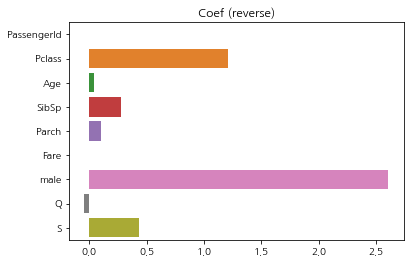

In [28]:
_ = sns.barplot(x=-(model_log.coef_[-1]), y=features_names).set_title("Coef (reverse)")

그래프를 좀 더 편하게 보기 위해, `-`를 붙여 그림